In [6]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 603s 4us/step


In [10]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
labels = ["飛機", "汽車", "鳥", "貓", "鹿",
          "狗", "青蛙", "馬", "船", "卡車"]

青蛙


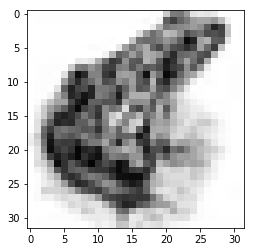

In [22]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
print(labels[y_train[c][0]])
plt.imshow(x_train[c])

In [23]:
x_train_shape = x_train / 255
x_test_shape = x_test  / 255
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
#Demo
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.layers import Reshape
cnn = Sequential()
# 9(格子) * 3(RGB) * 32(filters) + 32(bias)
cnn.add(Conv2D(32,(3, 3),
               activation="relu",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# 9 * 32(上一層特徵) * 64 + 64
cnn.add(Conv2D(64,(3, 3),
               activation="relu",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(128,(3, 3),
               activation="relu",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# MLP(大腦)
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

In [32]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn.fit(x_train_shape, y_train_cat, batch_size=200, epochs=10, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 46s 1ms/step - loss: 1.6937 - acc: 0.3816 - val_loss: 1.4532 - val_acc: 0.4726
Epoch 2/10
45000/45000 [==============================] - 49s 1ms/step - loss: 1.3556 - acc: 0.5163 - val_loss: 1.2544 - val_acc: 0.5544
Epoch 3/10
45000/45000 [==============================] - 50s 1ms/step - loss: 1.2019 - acc: 0.5741 - val_loss: 1.1616 - val_acc: 0.5896
Epoch 4/10
45000/45000 [==============================] - 51s 1ms/step - loss: 1.1043 - acc: 0.6109 - val_loss: 1.0886 - val_acc: 0.6302
Epoch 5/10
45000/45000 [==============================] - 51s 1ms/step - loss: 1.0259 - acc: 0.6431 - val_loss: 1.0367 - val_acc: 0.6432
Epoch 6/10
45000/45000 [==============================] - 52s 1ms/step - loss: 0.9574 - acc: 0.6652 - val_loss: 0.9897 - val_acc: 0.6612
Epoch 7/10
45000/45000 [==============================] - 53s 1ms/step - loss: 0.8971 - acc: 0.6886 - val_loss: 0.9364 - val_acc:

In [33]:
cnn.evaluate(x_test_shape, y_test_cat)


10000/10000 [==============================] - 4s 378us/step


[0.920511254119873, 0.6863]

In [34]:
cnn.save("simplecnn.h5")

In [35]:
from keras.models import load_model
old = load_model("simplecnn.h5")
old.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 4s 368us/step


[0.920511254119873, 0.6863]

In [36]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(confusion_matrix(y_test, cnn.predict_classes(x_test_shape)))


,0,1,2,3,4,5,6,7,8,9
0,620,31,68,13,57,11,29,18,96,57
1,8,778,1,11,7,8,18,7,37,125
2,35,12,462,68,154,89,110,39,17,14
3,8,14,29,470,106,183,107,42,17,24
4,2,5,21,45,723,30,75,76,15,8
5,4,4,28,148,75,622,40,59,5,15
6,3,4,15,36,46,20,852,8,7,9
7,7,2,14,47,114,79,11,696,2,28
8,34,36,10,16,15,8,16,5,823,37
9,17,61,7,18,8,9,15,16,32,817


In [37]:
labels

['飛機', '汽車', '鳥', '貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']